In [1]:
import pathlib
from matplotlib import pyplot as plt
import open_ephys.analysis as oea
from BlockSync2 import *
import pathlib
import pandas as pd
import numpy as np
from scipy import signal

In [3]:
# first, define the block of interest
block = BlockSync(animal_call='PV_24',
                  experiment_date='2021_12_30',block_num='034',
                  path_to_animal_folder=str(pathlib.Path(r'Z:\Nimrod\experiments')))


instantiated block number 034 at Path: Z:\Nimrod\experiments\PV_24\2021_12_30\block_034
Found the sample rate for block 034 in the xml file, it is 20000 Hz


In [4]:
# get closer to the ep data
sample_rate = block.sample_rate
session = oea.Session(str(block.oe_path.parent))
rec_node = session.recordnodes[0]
time_frame = [10,30]
segment = (time_frame[0]*sample_rate,time_frame[1]*sample_rate)
array = rec_node.recordings[0].continuous[0].samples[segment[0]:segment[1],32:]



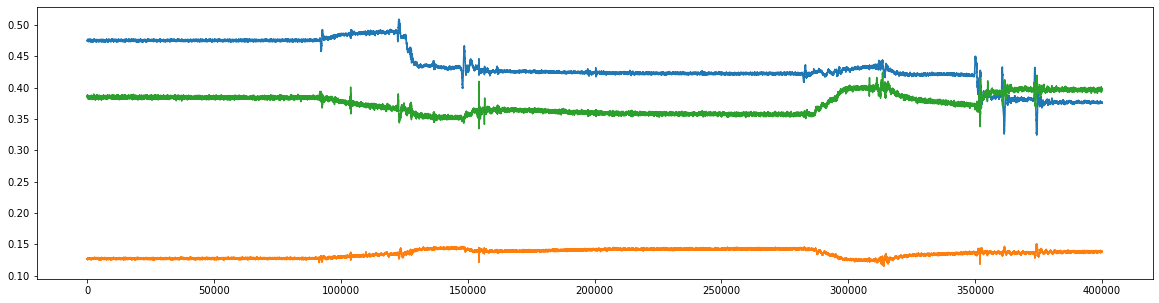

In [8]:
# combine the three-axis accelerometer data
accelerometer_data = array[:]
diffs = np.diff(accelerometer_data,axis=0)
fig, axes = plt.subplots(figsize=(20,5))
axes.plot(accelerometer_data)
#axes.set_ylim(-0.01,0.01)

In [9]:
# look at the same segment of data but for electrode 15
ep_data = rec_node.recordings[0].continuous[0].samples[segment[0]:segment[1],10:24]
#fig, axes = plt.subplots(figsize=(20,5))
np.shape(ep_data)

(400000, 14)

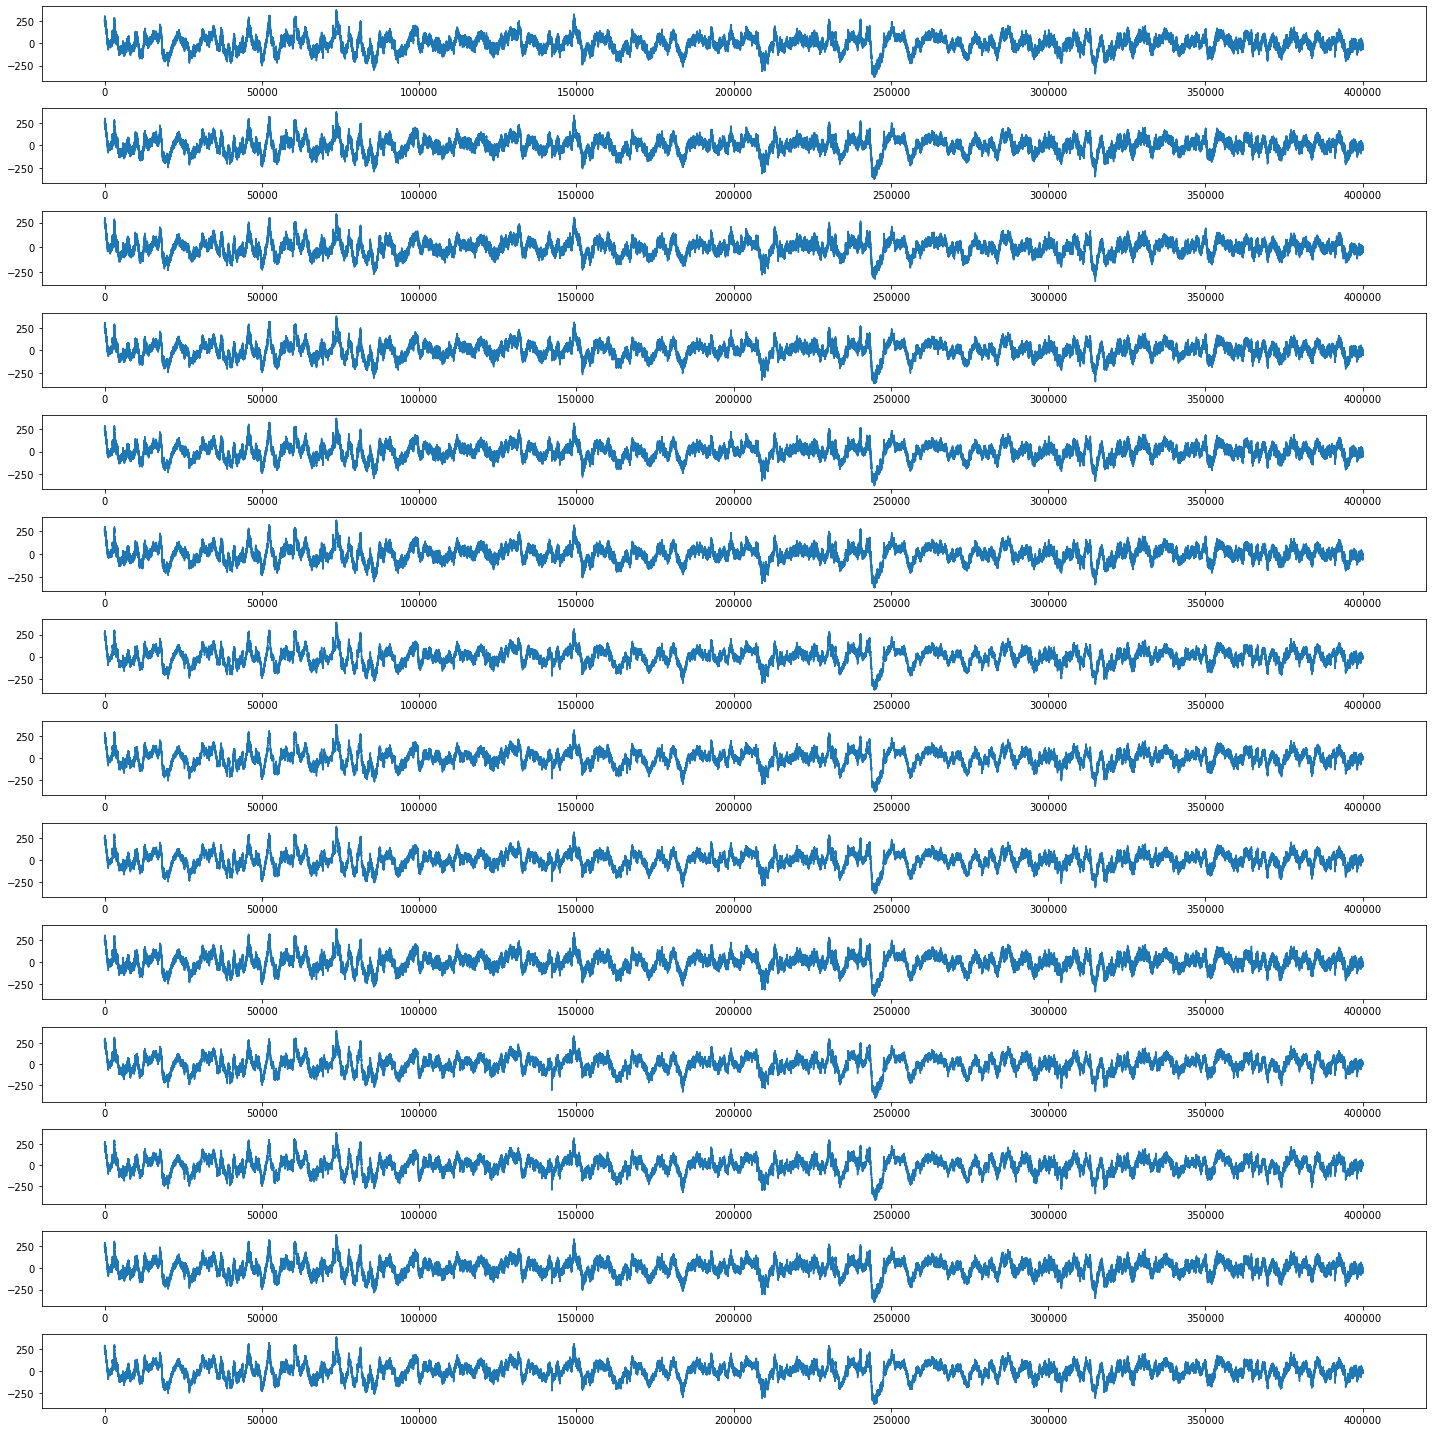

In [10]:
fig, axes = plt.subplots(nrows=np.shape(ep_data)[1],figsize=(20,20))
for i, ax in enumerate(axes.flatten()):
    ax.plot(ep_data[:,i])

fig.tight_layout()